<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

In [1]:
import numpy as np
import pandas as pd
import scipy
from matplotlib import pylab, gridspec, pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Задание 1
## Простейший kNN
Вам выданы координаты точек и метки классов. Нужно для новой точки предсказать метку класса.

In [3]:
reds = pd.read_csv('ml_basics/reds.txt',header=None)[1]
blues = pd.read_csv('ml_basics/blues.txt',header=None)[1]

In [4]:
reds.head()

0    3.241702
1    6.241627
2    6.170588
3    4.413796
4    1.553473
Name: 1, dtype: float64

In [5]:
blues.shape

(800,)

In [6]:
a = [x for x in range(800)]
red_pairs=[[i,reds[i]] for i in range(800)]
blue_pairs=[[i,blues[i]] for i in range(800)]

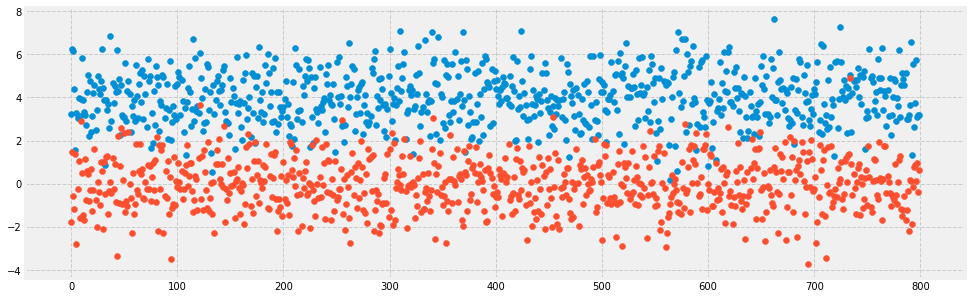

In [7]:
plt.figure(figsize=(15,5))
plt.scatter(a,reds)
plt.grid(ls='--')
plt.scatter(a,blues)

 Напишем функцию, которая выбирает для заданного **k** и координат точки наиболее подходящий класс по методу k ближайших соседей. Здесь (x,y) $-$ координаты точек

In [8]:
def guess_class(x,y,k):
    '''
        Функция отрисовки окрестности точки (x,y) и функция поиска расстояния между точками b,c на плоскости
    '''
    def draw_points(x,y):
        plt.figure(figsize=(5,5))
        plt.grid(ls='--')
        plt.scatter(a,blues,c='b')
        plt.scatter(a,reds,c='r')
        plt.scatter(x,y,c='g')
        plt.xlim(x-7, x+7)
        plt.ylim(y-7, y+7)
    draw_points(x,y)
    
    def distance_2d(b,c):
        return np.sqrt((b[0]-c[0])**2+(b[1]-c[1])**2)
    '''
        Функция подсчета расстояний между ближайшими k точками
    '''
    def calculate_k_distances(class_points,l):
        distances = []
        labels = []
        for point in class_points:
            # считаем расстояние от точки до точки класса
            distances.append(distance_2d(point,[x,y]))
        distances = np.sort(distances)[::-1]
        return [(x,l) for x in distances[:k]]  
             
    b = np.array(calculate_k_distances(blue_pairs,'b')) # расстояния до ближайших k соседей класса blue
    r = np.array(calculate_k_distances(red_pairs,'r')) # расстояния до ближайших k соседей класса red
    
    print('Ближайшие {} синих соседей'.format(k),b)
    print('Ближайшие {} красных соседей'.format(k),r)
    nearest_k_dists = pd.DataFrame(np.concatenate((b,r)),
                                   columns=['distance', 'label']).sort_values(by='distance',
                                                                              ascending=False)[::-1][:k]
    print('======================================================')
    print(nearest_k_dists)
    r, b =0, 0 
    for i in range(2*k):
        try:
            if nearest_k_dists['label'][i] == 'r':
                r += 1
            else:
                b += 1
        except:
            continue
    if r > b :
        print('red')
    else:
        print('blue')

Ближайшие 1 синих соседей [['599.0015342976963' 'b']]
Ближайшие 1 красных соседей [['599.0011386397571' 'r']]
            distance label
1  599.0011386397571     r
red


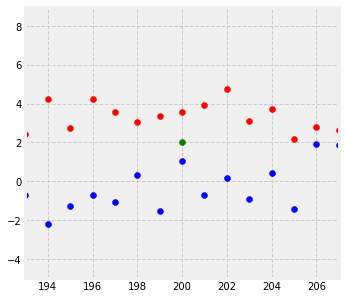

In [9]:
guess_class(200,2,1)